In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer





#Import data

In [ ]:
!git clone -l -s git://github.com/AshraqatM/NLP_clustering.git cloned-repo
%cd cloned-repo
!ls


Cloning into 'cloned-repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 1.44 MiB | 8.56 MiB/s, done.
/content/cloned-repo
oversampling_dataset.csv


In [ ]:
df = pd.read_csv("oversampling_dataset.csv")
df.shape

(21232, 5)

###ELbow with different feature engineering

In [ ]:
def plot_sihouette(silhouette_point):
  plt.figure(figsize=(7, 7))
  x=range(2, 11,1)
  ax=plt.plot(x, silhouette_point)
  ymax = max(silhouette_point)
  xpos = silhouette_point.index(ymax)
  xmax = x[xpos]
  plt.annotate('max', xy=(xmax, ymax), xytext=(xmax, ymax-0.1),
            arrowprops=dict(facecolor='black', shrink=0.005))

  plt.title('Silhouette Score')
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette')
  plt.show() 
   

In [ ]:
def plot_elbow(data):
  plt.plot(range(2, 11,1), data)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()  
   

In [ ]:
def elbow(data):
  wcss = []
  silhouette_point=[]
  for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    label = kmeans.fit_predict(data)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    silhouette_point.append(silhouette_score(data,label))
    
  
  plot_elbow(wcss)
  plot_sihouette(silhouette_point)

###n-gram and pca

In [ ]:
cv = CountVectorizer(ngram_range = (1,1))
text_counts_normal= cv.fit_transform(df['text_normal_tokens'])
text_counts_farasa= cv.fit_transform(df['text_farasa_tokens'])
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(text_counts_normal.toarray())
X_pca2 = pca.fit_transform(text_counts_farasa.toarray())

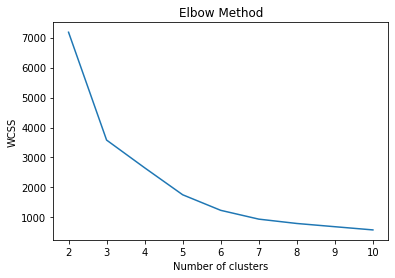

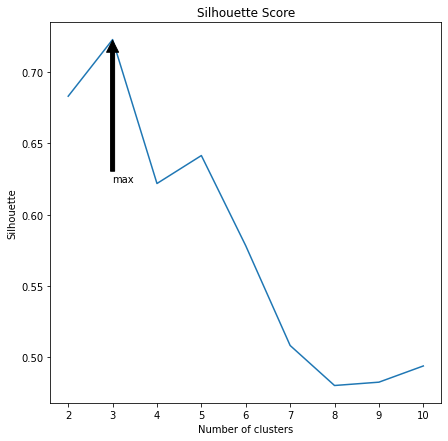

In [ ]:
elbow(X_pca1)

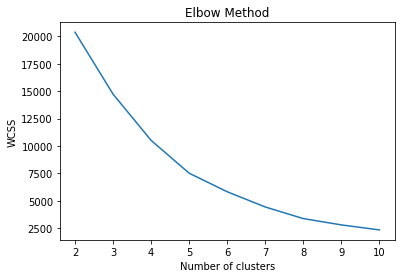

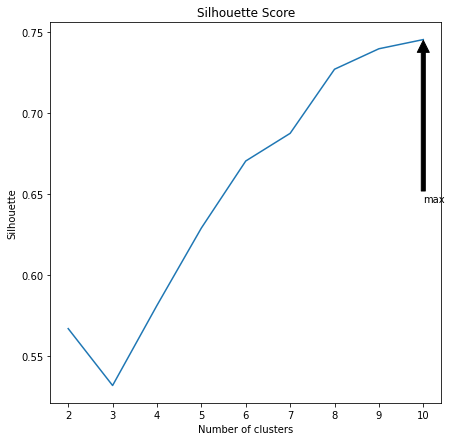

In [ ]:
elbow(X_pca2)

###TF-IDF and pca

In [ ]:
tf=TfidfVectorizer()
text_TFIDF_normal= tf.fit_transform(df['text_normal_tokens'])
text_TFIDF_farasa= tf.fit_transform(df['text_farasa_tokens'])
X_pca1_TFIDF = pca.fit_transform(text_TFIDF_normal.toarray())
X_pca2_TFIDF = pca.fit_transform(text_TFIDF_farasa.toarray())

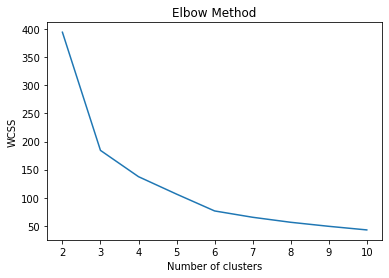

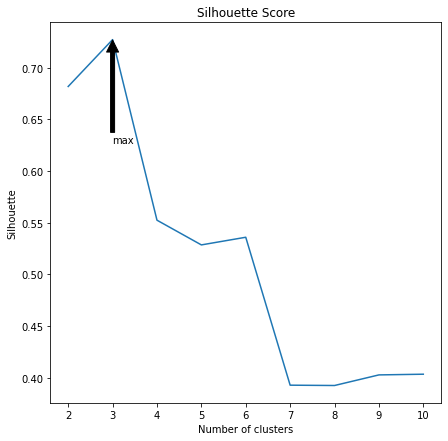

In [ ]:
elbow(X_pca2_TFIDF)

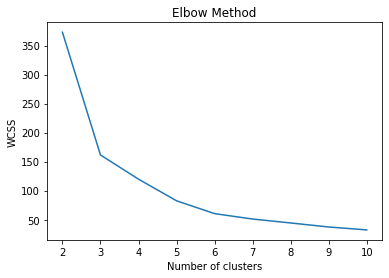

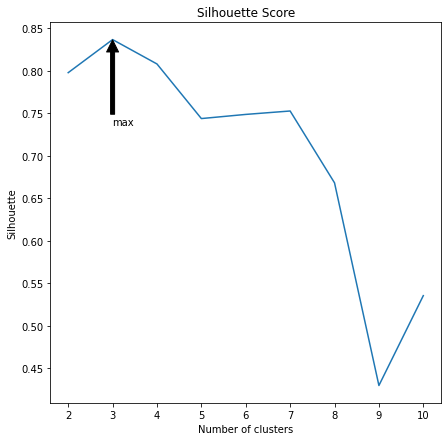

In [ ]:
elbow(X_pca1_TFIDF)


for the unigram and tf-idf :

1.   unigram : normal 3 clusters and frasa 10 clusters

2.   tf-idf : normal 3  clusters in and farasa 3 clusters 







###kmeans algorithm Plots


In [ ]:
def plot_kmenas(number,data):
  model = KMeans(n_clusters=number, init='k-means++', max_iter=300)
  label = model.fit_predict(data)
  #Getting unique labels
  u_labels = np.unique(label)
  for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  plt.legend()
  plt.show()

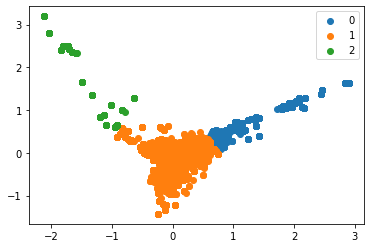

In [ ]:
plot_kmenas(3,X_pca1)

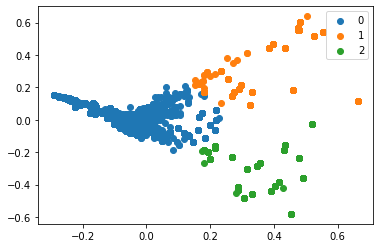

In [ ]:
plot_kmenas(3,X_pca1_TFIDF)


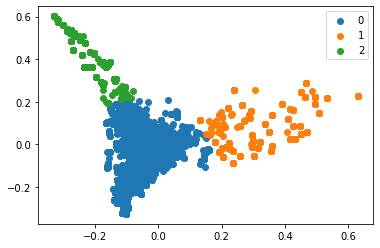

In [ ]:
plot_kmenas(3,X_pca2_TFIDF)

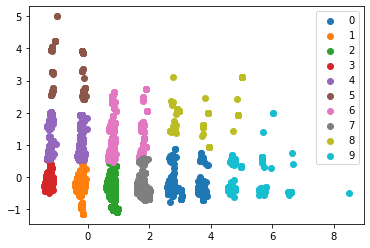

In [ ]:
plot_kmenas(10,X_pca2)

In [ ]:
from collections import Counter, defaultdict
model = KMeans(n_clusters=3, init='k-means++', max_iter=300)
label = model.fit_predict(X_pca2_TFIDF)

clusters_indices = defaultdict(list)
for index, c  in enumerate(model.labels_):
     clusters_indices[c].append(index)


df_cluster_0=df.iloc[clusters_indices[0],:]
df_cluster_1=df.iloc[clusters_indices[1],:]
df_cluster_2=df.iloc[clusters_indices[2],:]


print(df_cluster_0.category.unique())
print(df_cluster_1.category.unique())
print(df_cluster_2.category.unique())


     #array 


['discredit' 'none' 'damning' 'stereotyping & objectification'
 'threat of violence' 'derailing' 'dominance' 'sexual harassment']
['discredit' 'sexual harassment']
['dominance' 'none' 'discredit']


In [ ]:
tf=TfidfVectorizer() 
text_TFIDF_normal= tf.fit(df['text_normal_tokens'])
text_TFIDF_normal_trans= text_TFIDF_normal.transform(df['text_normal_tokens'])
df.iloc[clusters_indices[1],:]


,Unnamed: 0,text,category,text_normal_tokens,text_farasa_tokens
173,173,بوز ديمالواطيه سد سديه,discredit,"['بوز', 'ديمالواطيه', 'سد', 'سديه']","['بوز', 'ديمالواطيه', 'سد', 'سدي+ه']"
352,352,اساس الفتنه انت بوزك سدي عكروتي يا,sexual harassment,"['اساس', 'الفتنه', 'بوزك', 'سدي', 'عكروتي']","['اساس', 'ال+فتنه', 'بوز+ك', 'سدي', 'عكروتي']"
441,441,انتي بالذات بوزك حيوانه سدي,discredit,"['بالذات', 'بوزك', 'حيوانه', 'سدي']","['ب+ال+ذات', 'بوز+ك', 'حيوان+ه', 'سدي']"
761,761,المحن ثوار علنسوان قوموا يا,sexual harassment,"['المحن', 'ثوار', 'علنسوان', 'قوموا']","['ال+محن', 'ثوار', 'علنسوان', 'قوم+وا']"
814,814,زعره مشتقلك يا,sexual harassment,"['زعره', 'مشتقلك']","['زعر+ه', 'مشتقلك']"
...,...,...,...,...,...
16290,16290,احكي ال الجميلات الصراحه امثالك انزل بالضبط بح...,sexual harassment,"['احكي', 'الجميلات', 'الصراحه', 'امثالك', 'انز...","['احكي', 'ال+جميل+ات', 'ال+صراحه', 'امثال+ك', ..."
16291,16291,احكي ال الجميلات الصراحه امثالك بالضبط بحبو بر...,sexual harassment,"['احكي', 'الجميلات', 'الصراحه', 'امثالك', 'بال...","['احكي', 'ال+جميل+ات', 'ال+صراحه', 'امثال+ك', ..."
16292,16292,الدوله الشريفه العفيفه طاهره عطرابلس عكروته مت...,sexual harassment,"['الدوله', 'الشريفه', 'العفيفه', 'طاهره', 'عطر...","['ال+دوله', 'الشريف+ه', 'ال+عفيفه', 'طاهر+ه', ..."
16294,16294,اساس الفتنه انت ايضا بوزك ديمالواطيه سدي سوف ع...,sexual harassment,"['اساس', 'الفتنه', 'ايضا', 'بوزك', 'ديمالواطيه...","['اساس', 'ال+فتنه', 'ايض+ا', 'بوز+ك', 'ديمالوا..."
